In [1]:
import pandas as pd 
import numpy as np
import sys
import datetime
import spacy
tweets = pd.read_csv (r'C:\Users\enoch\Documents\notAboutToMakeMoney\trumptweets.csv')
prices = pd.read_csv (r'C:\Users\enoch\Documents\notAboutToMakeMoney\^GSPC.csv')


tweets["created_at"]= pd.to_datetime(tweets["created_at"]) 
tweets['date'] = tweets['created_at'].dt.date
prices["Date"]= pd.to_datetime(prices["Date"]) 
prices['date'] = prices['Date'].dt.date
prices = prices.set_index(['date'])
tweets = tweets.set_index(['date'])



  

In [2]:
prices

,Date,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2016-11-01,2016-11-01,2128.679932,2131.449951,2097.850098,2111.719971,2111.719971,4532160000
2016-11-02,2016-11-02,2109.429932,2111.760010,2094.000000,2097.939941,2097.939941,4248580000
2016-11-03,2016-11-03,2098.800049,2102.560059,2085.229980,2088.659912,2088.659912,3886740000
2016-11-04,2016-11-04,2083.790039,2099.070068,2083.790039,2085.179932,2085.179932,3837860000
2016-11-07,2016-11-07,2100.590088,2132.000000,2100.590088,2131.520020,2131.520020,3736060000
...,...,...,...,...,...,...,...
2020-09-14,2020-09-14,3363.560059,3402.929932,3363.560059,3383.540039,3383.540039,3832130000
2020-09-15,2020-09-15,3407.729980,3419.479980,3389.250000,3401.199951,3401.199951,4051460000
2020-09-16,2020-09-16,3411.229980,3428.919922,3384.449951,3385.489990,3385.489990,4710030000


In [3]:
relevantdate = prices.index.tolist() 
def following(time):
    if time not in relevantdate or (prices.loc[time].loc["High"]==0):
        return following(time+datetime.timedelta(days=1))
    else:
        return time;

def previous(time):
    if time not in relevantdate or (prices.loc[time].loc["High"]==0):
        return previous(time-datetime.timedelta(days=1))
    else:
        return time;

In [4]:
tweetvolume=tweets.index.value_counts()
vol=pd.DataFrame(tweetvolume)

In [18]:
vol.sort_index()
vol=vol.rename(columns={"date":"tweetvolume"})


In [13]:
voldates = vol.index.tolist()
volchanges=[]
for date in voldates:
    print(prices.loc[following(date+datetime.timedelta(days=1))].High,prices.loc[previous(date)].High)

    change = prices.loc[following(date+datetime.timedelta(days=1))].High - prices.loc[previous(date)].High
    print(change)
    volchanges.append(change)
   

3326.8798829999996 3337.77002
-10.890137000000323
2944.25 2932.159912
12.090087999999923
2300.72998 2453.01001
-152.2800299999999
2782.459961 2818.570068
-36.11010699999997
3258.850098 3333.179932
-74.32983400000012
2840.189941 2891.310059
-51.12011799999982
2931.679932 2954.1298829999996
-22.4499509999996
2869.090088 2930.909912
-61.81982400000015
3352.26001 3341.419922
10.840087999999923
3352.26001 3341.419922
10.840087999999923
3352.26001 3341.419922
10.840087999999923
3258.850098 3333.179932
-74.32983400000012
2983.850098 2987.310059
-3.459961000000021
2914.389893 2940.429932
-26.04003899999998
3136.719971 3090.959961
45.760009999999966
2300.72998 2453.01001
-152.2800299999999
2945.820068 2944.25
1.570067999999992
2987.310059 2987.280029
0.030029999999896972
3007.330078 3000.0
7.330077999999958
3258.850098 3333.179932
-74.32983400000012
3017.800049 3013.919922
3.880126999999902
3337.580078 3306.919922
30.660155999999915
2874.139893 2945.820068
-71.68017499999996
2676.850098 2538.17

In [14]:
vol['change']=volchanges

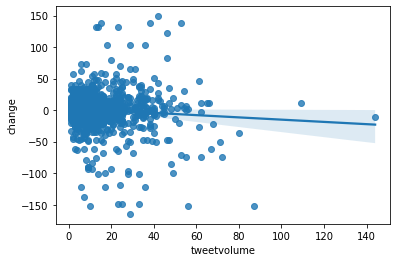

In [20]:
import seaborn as sns
sns.regplot(y='change',x='tweetvolume',data=vol)